# Data Science Job Postings and Salaries Analysis

The two datasets used in the mini-project are
- title_location_company_salary.xls
- Job_skills_qualifications.xls

---

## 1.  Problem Definition

Predict the **`salary`** and **`level`** of staffs using features in the two datasets.
- if the prediction is accurate enough, we try to find the anomalies.

---

## 2. Dataset Preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_salary = pd.read_excel("title_location_company_salary.xls", converters = {'Salary' : int})
df_skills = pd.read_excel("Job_skills_qualifications.xls")

In [3]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Job_ID   1287 non-null   int64 
 1   Title    1287 non-null   object
 2   Company  1285 non-null   object
 3   City     1116 non-null   object
 4   State    1287 non-null   object
 5   Salary   1209 non-null   object
 6   Levels   1287 non-null   object
dtypes: int64(1), object(6)
memory usage: 70.5+ KB


In [4]:
df_salary.head(10)

,Job_ID,Title,Company,City,State,Salary,Levels
0,0,Data Scientist,Numerdox,Sacramento,California,110000,Jr.
1,1,Data Analyst,Cepheid,Lodi,California,120000,Unknown
2,2,Data Scientist,Cepheid,Sunnyvale,California,150000,Staff
3,3,Data Scientist,Verana Health,San Francisco,California,150000,Unknown
4,4,Data Scientist,Tinder,San Francisco,California,130000,Jr.
5,5,Data Scientist,JPL/NASA,Pasadena,California,100000,Jr.
6,6,Data Scientist,IBM,San Jose,California,120000,Unknown
7,7,Data Scientist,Indeed,San Francisco,California,223000,Sr.
8,8,Data Scientist,Ezoic,Carlsbad,California,100000,Unknown
9,9,Data Scientist,City of Hope,NaN,California,NaN,Unknown


- The **`df_salary`** table shows the index, job title, company, city, state, salary and level for each staff.

In [5]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 256 entries, Job_ID to Calibration
dtypes: float64(255), int64(1)
memory usage: 2.5 MB


In [6]:
df_skills.head(5)

,Job_ID,Analysis skills,Communication skills,Research,R,Machine learning,Bachelor's degree,Master's degree,Doctoral degree,Doctor of Philosophy,...,Scrum,VBA,Ceridian,MTA,New Relic,Sailpoint,DevOps,Backbone.js,Computer networking,Calibration
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- The **`df_skills`** table shows the skills status for each staff. `1` means `have` and `0` means `dont have`.

---

## 3. Data Cleaning / Preparation


1.  Delete the State column in the **`df_salary`** table, as `state` is always California.

In [7]:
df_salary = df_salary.drop(columns = ['State'])

2.  Drop the rows in which the `Salary` cell in **`df_salary`** table is empty or skills info is missing in **`df_skills`** table.

In [8]:
df_salary['Salary'].fillna(-1, inplace = True)
df_skills.fillna(-1, inplace = True)
drop_rows = []
count = df_salary.shape[0]
for i in range(0, count) :
    if (df_salary['Salary'][i] < 0) | (df_skills['R'][i] < 0) :
        drop_rows.append(i)
df_salary = df_salary.drop(drop_rows)
df_skills = df_skills.drop(drop_rows)

In [9]:
df_salary.head(10)

,Job_ID,Title,Company,City,Salary,Levels
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.
1,1,Data Analyst,Cepheid,Lodi,120000,Unknown
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff
3,3,Data Scientist,Verana Health,San Francisco,150000,Unknown
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.
5,5,Data Scientist,JPL/NASA,Pasadena,100000,Jr.
6,6,Data Scientist,IBM,San Jose,120000,Unknown
7,7,Data Scientist,Indeed,San Francisco,223000,Sr.
8,8,Data Scientist,Ezoic,Carlsbad,100000,Unknown
10,10,Data Scientist,Airtable,San Francisco,130000,Unknown


3.  As some company and city cells in **`df_salary`** table are also empty, instead of dropping them, we replace them into `Unknown`.

In [10]:
df_salary['Company'].fillna('Unknown', inplace = True)
df_salary['City'].fillna('Unknown', inplace = True)

4.  As there're too many skills listed in the **`df_skills`** table, so we decide to select some skills instead of all. 
To achieve the target, we build **`df_count`** table for each skill with its total count of all staffs.

In [11]:
df_skills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1286
Columns: 256 entries, Job_ID to Calibration
dtypes: float64(255), int64(1)
memory usage: 2.4 MB


In [12]:
skills = df_skills.columns[1:]

In [13]:
sum_count = []
for i in skills:
    sum_count.append(sum(df_skills[i]))

In [14]:
df_count = pd.DataFrame()
df_count['skill'] = skills
df_count['skills_count'] = sum_count
df_count.describe()

,skills_count
count,255.000000
mean,35.658824
std,95.830997
min,0.000000
25%,2.000000
50%,5.000000
75%,23.500000
max,655.000000


<AxesSubplot:xlabel='skills_count', ylabel='Count'>

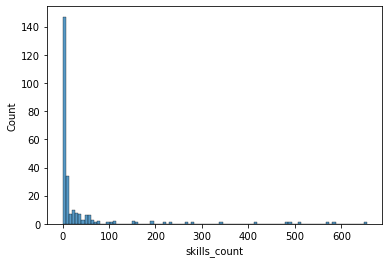

In [15]:
sns.histplot(data = df_count['skills_count'])

- Through the description and histogram of **`df_count`** table, we notice that the majority of skills' total count are less than `23.5` (75th percentile). Hence, we drop such skills and save the rest skills info into **`df_skills2`**.

In [16]:
df_count = df_count[df_count['skills_count'] > 23.5]

<AxesSubplot:ylabel='Count'>

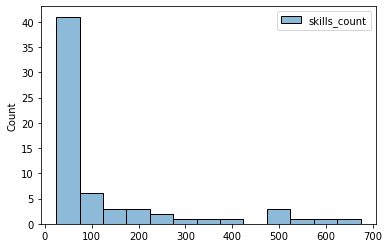

In [17]:
sns.histplot(data = df_count, binwidth = 50)

In [18]:
skills2 = list(df_count['skill'])
df_skills2 = df_skills[skills2].astype(int)
df_skills2['Job_ID'] = df_skills['Job_ID']

4.  Combine two tables **`df_salary`** and **`df_skills2`** based on `Job_ID` into our final table **`df_staff`**.

In [19]:
df_staff = df_salary.merge(df_skills2)
df_staff.head(5)

,Job_ID,Title,Company,City,Salary,Levels,Analysis skills,Communication skills,Research,R,...,Torch,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Analyst,Cepheid,Lodi,120000,Unknown,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Data Scientist,Verana Health,San Francisco,150000,Unknown,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5.  Select the rows whose `Levels` cell is not `Unknown` and save them into another final table **`df_levels`**.

In [20]:
df_levels = df_staff[df_staff['Levels'] != 'Unknown']
df_levels.head(5)

,Job_ID,Title,Company,City,Salary,Levels,Analysis skills,Communication skills,Research,R,...,Torch,Azure,NoSQL,Master of Science,Windows,Scripting,Marketing,New Relic,DevOps,Computer networking
0,0,Data Scientist,Numerdox,Sacramento,110000,Jr.,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,Cepheid,Sunnyvale,150000,Staff,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Data Scientist,Tinder,San Francisco,130000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Data Scientist,JPL/NASA,Pasadena,100000,Jr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,Data Scientist,Indeed,San Francisco,223000,Sr.,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6.  Save the tables into excel files.

In [21]:
df_salary.to_excel('Salary.xlsx', index = False)
df_skills2.to_excel('Skills.xlsx', index = False)
df_staff.to_excel('Staff.xlsx', index = False)
df_levels.to_excel('Levels.xlsx', index = False)

---

## 4. Data Analysis / Visualization

1. Check the number of unique levels for categorical data to determine suitable visualisation tool

In [22]:
print("Number of unqiue classes in Title :", len(df_staff["Title"].unique()))
print("Number of unqiue classes in Company :", len(df_staff["Company"].unique()))
print("Number of unqiue classes in City :", len(df_staff["City"].unique()))
print("Number of unqiue classes in Levels :", len(df_staff["Levels"].unique()))

Number of unqiue classes in Title : 13
Number of unqiue classes in Company : 501
Number of unqiue classes in City : 77
Number of unqiue classes in Levels : 7


2. Visualisation for **`Job Titles`**

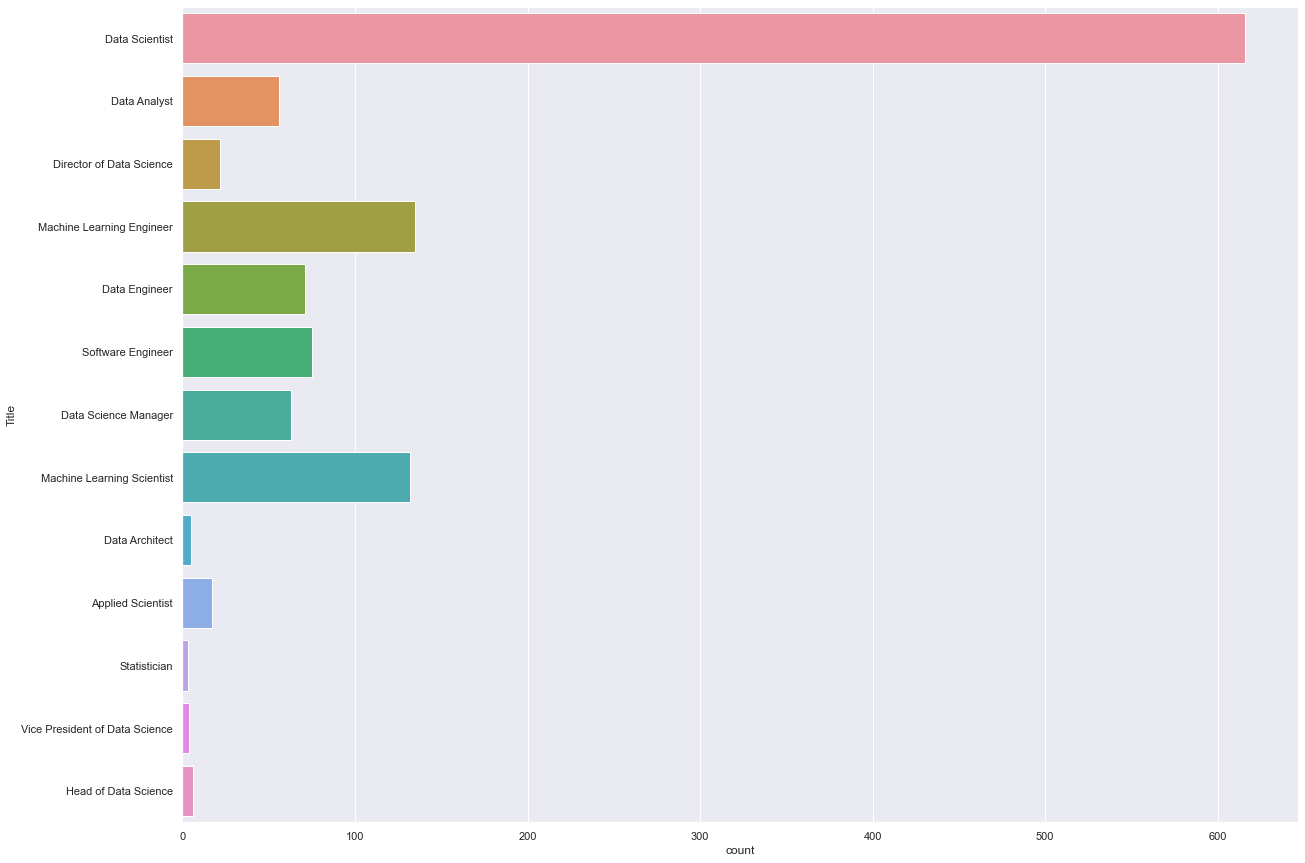

In [23]:
plt.figure(figsize=(20, 15))
sns.set(font_scale = 1)
sns.countplot(data = df_staff, y = 'Title')
plt.show()

- In the countplot, the `Data Scientist` group is the most common occupation for our dataset by a significant margin, followed by `Machine Learning Engineer` and `Machine Learning Scientist`.

<AxesSubplot:xlabel='Salary', ylabel='Title'>

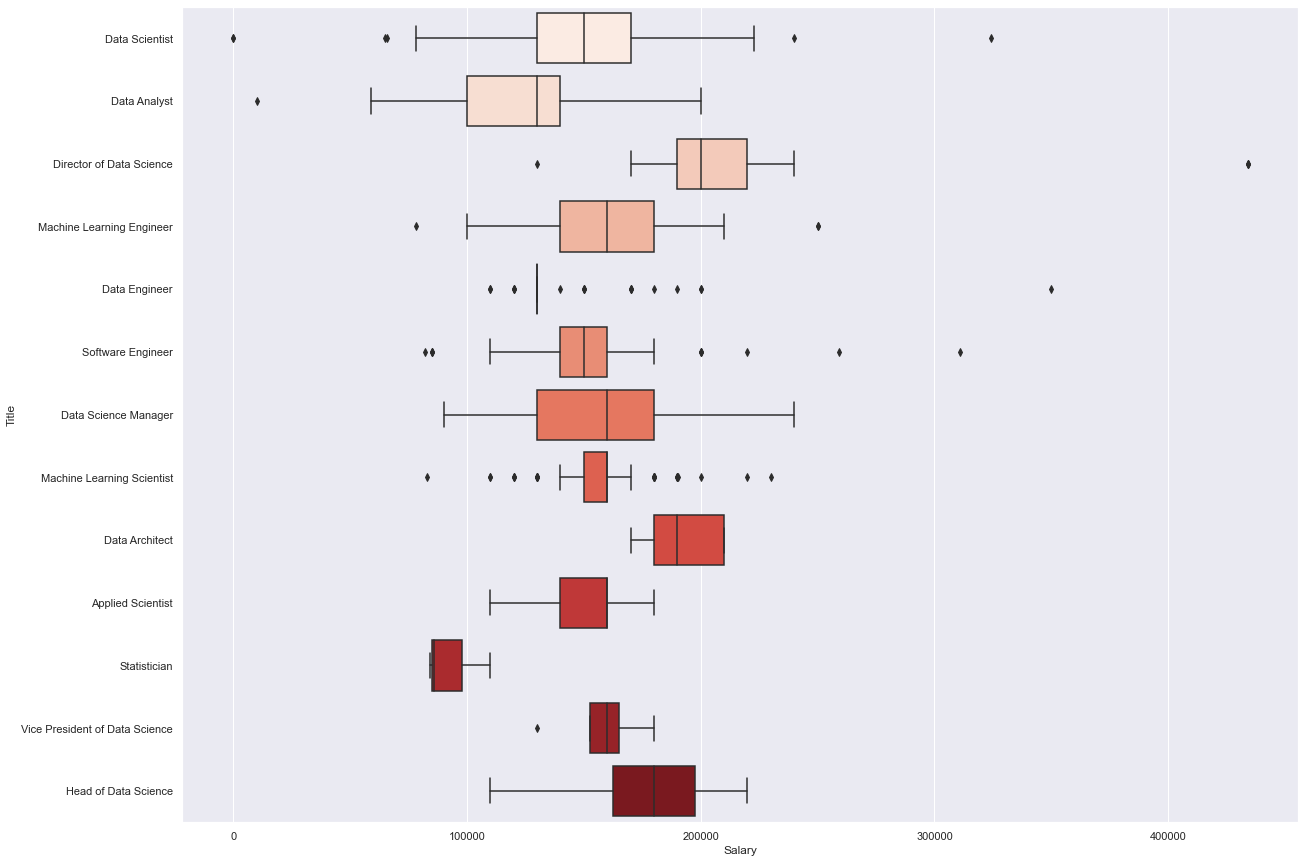

In [24]:
f, axes = plt.subplots(figsize=(20, 15))
sns.boxplot(x = 'Salary', y = 'Title', data = df_staff, palette="Reds")

3. Visualisation for **`Company`**

In [25]:
company = pd.DataFrame(df_staff["Company"].value_counts())
company.describe()

,Company
count,501.000000
mean,2.405190
std,6.262387
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,103.000000


- Every company has a mean of only 1 employee, with 75% of companies having 2 or fewer employees.
- Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

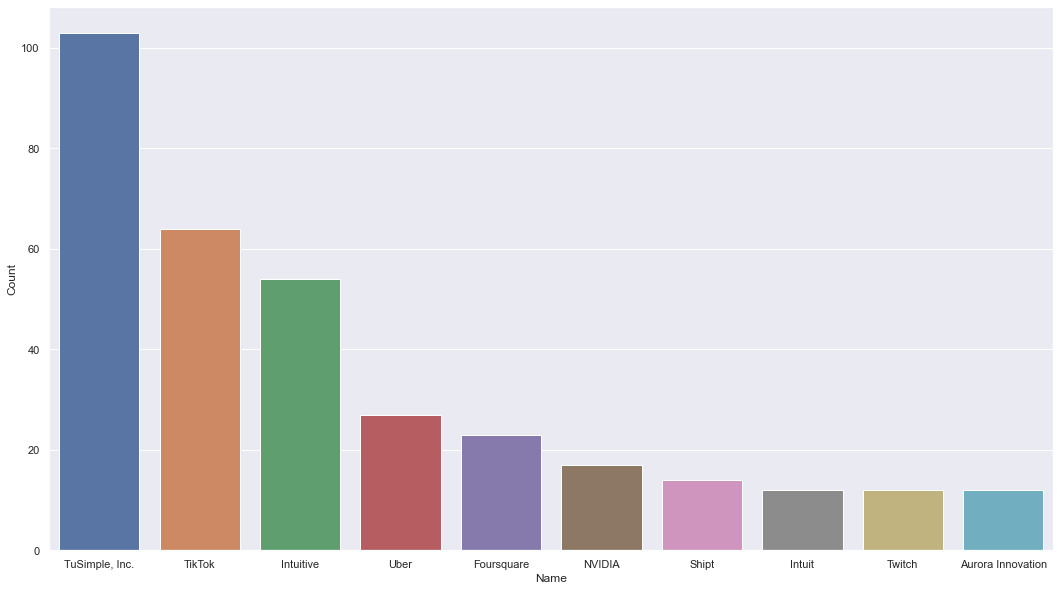

In [26]:
company_count = pd.DataFrame()
company_count = df_staff.loc[:,'Company'].value_counts()
company_count = company_count.to_frame()
company_count['Name'] = company_count.index
company_count = company_count.iloc[0:10 , :]
company_count = company_count.rename(columns = {'Company' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = company_count, x = 'Name', y = 'Count')
plt.show()

- Here, we show the `top-10` companies with largest count of staffs.

4. Visualisation for **`City`**

In [27]:
city = pd.DataFrame(df_staff["City"].value_counts())
city.describe()

,City
count,77.000000
mean,15.649351
std,46.309532
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,334.000000


- Similary, every city has a mean of only 2 employees, with 75% of cities having 6 or fewer employees. 
- Due to the low sample size, company is not a suitable predictor for our model. It will be ignored.

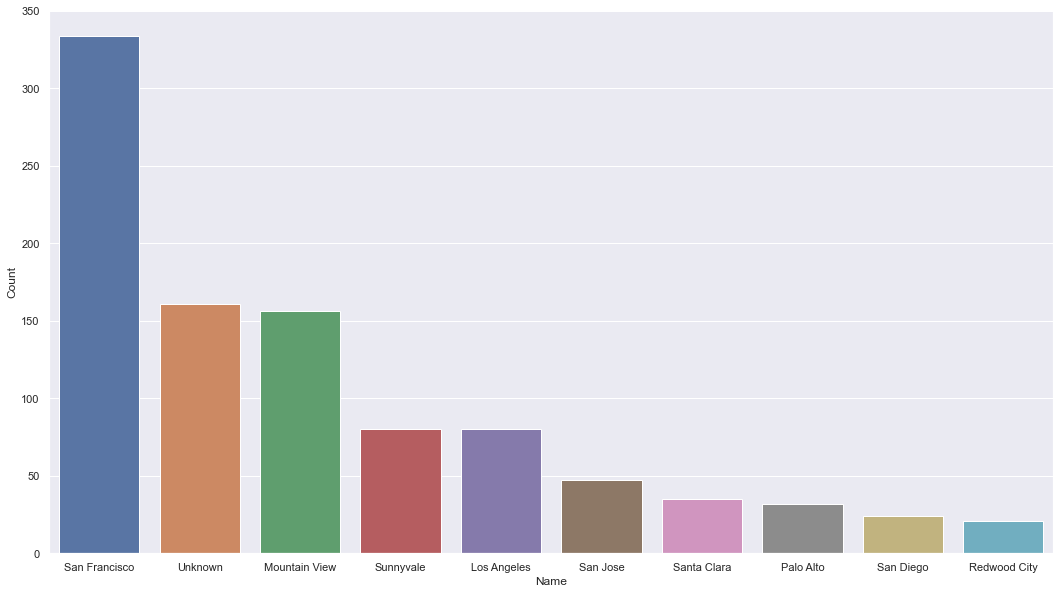

In [28]:
city_count = pd.DataFrame()
city_count = df_staff.loc[:,'City'].value_counts()
city_count = city_count.to_frame()
city_count['Name'] = city_count.index
city_count = city_count.iloc[0:10 , :]
city_count = city_count.rename(columns = {'City' : 'Count'})

plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.barplot(data = city_count, x = 'Name', y = 'Count')
plt.show()

- Here, we show the `top-10` cities with largest count of workers.

5. Visualisation for **`Levels`**

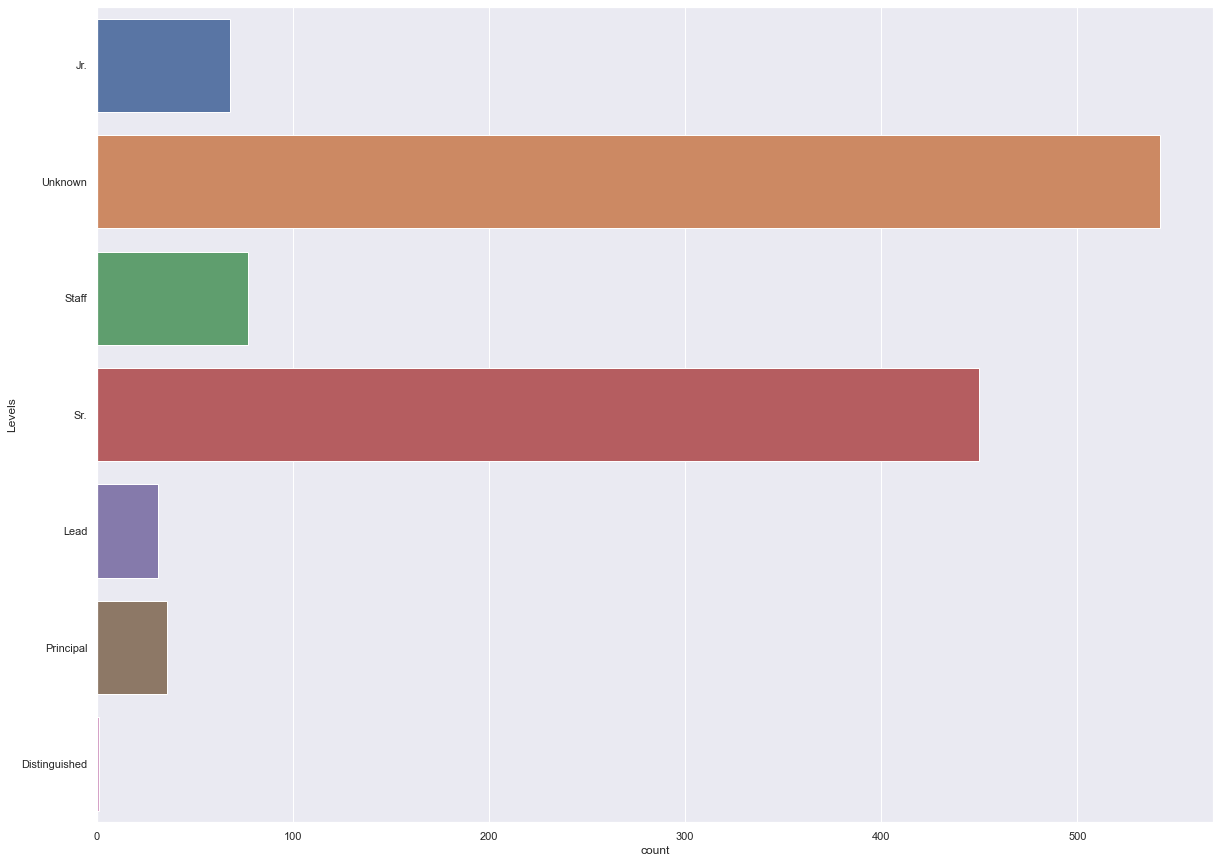

In [29]:
plt.figure(figsize = (20, 15))
sns.set(font_scale = 1)
sns.countplot(data = df_staff, y = 'Levels')
plt.show()

- The majority of levels are `Unknown`, which will then be predicted.
- Except `Unknown`, the level `Sr.` is the most common experience level for our dataset by a significant margin.

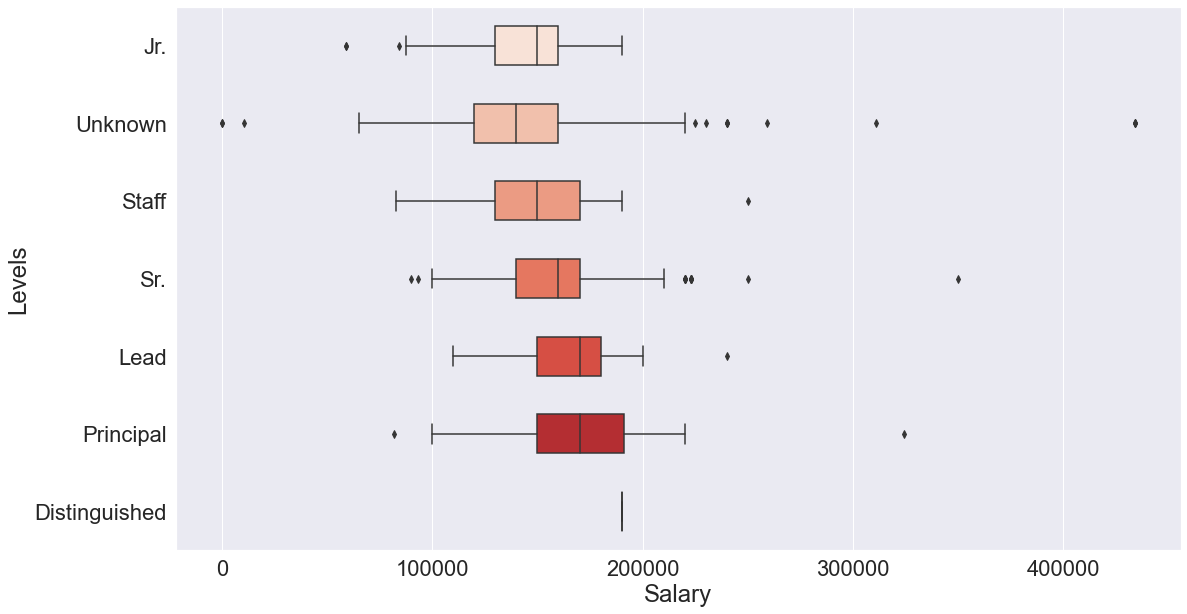

In [30]:
plt.figure(figsize=(18, 10))
sns.set(font_scale = 2)
sns.boxplot(y = 'Levels', x = 'Salary', data = df_staff, width = 0.5, palette="Reds")
plt.show()

6. Visualisation for **`Salary`**

<AxesSubplot:>

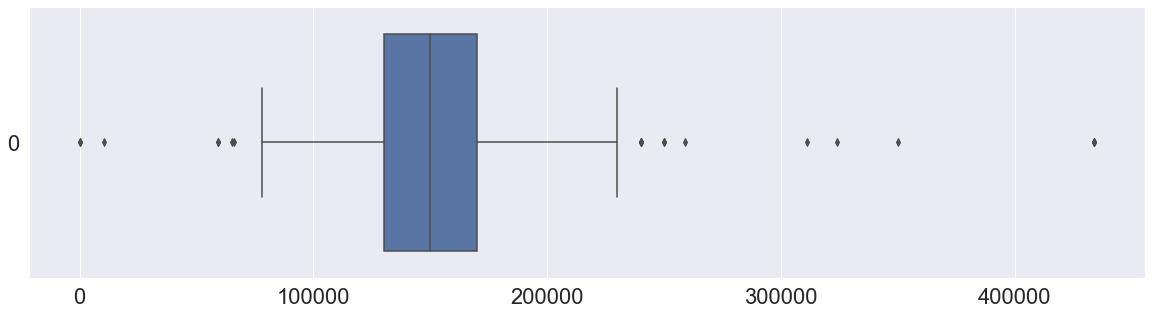

In [31]:
f, axes = plt.subplots(figsize=(20, 5))
sns.boxplot(data = df_staff["Salary"], orient = "h")

- The vast majority of data points fall within `[130000, 170000]`, and mean is `150000`.
- However, there are 12 outliers which deviate significantly from the mean.

7. Visualisation for **`Skills`**

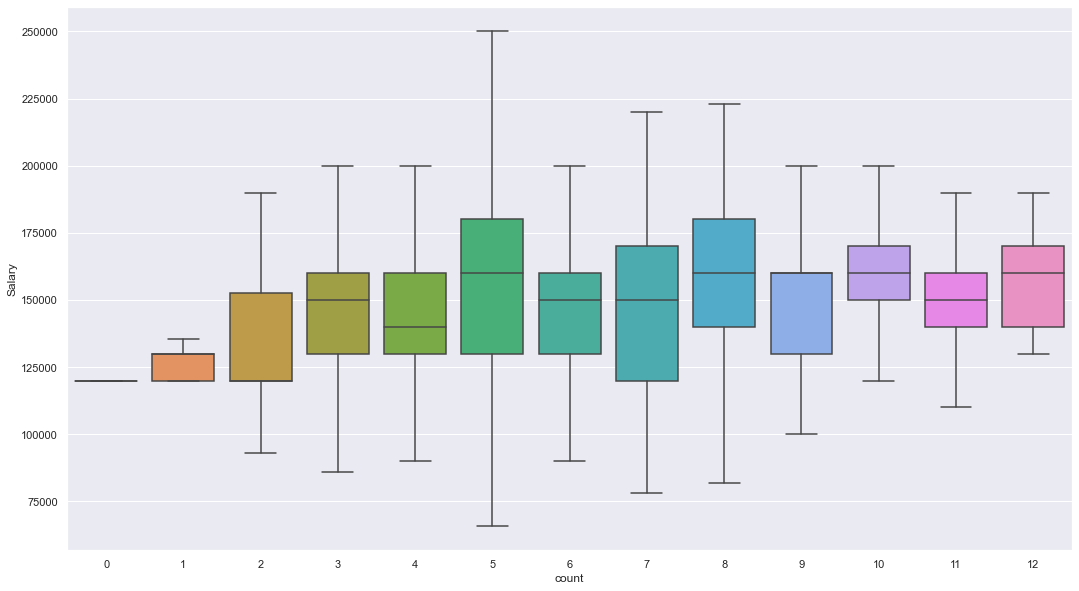

In [32]:
df_factors = df_staff
df_factors['count'] = df_factors.iloc[:,6:].sum(axis=1)
plt.figure(figsize=(18, 10))
sns.set(font_scale = 1)
sns.boxplot(x = "count", y = "Salary", data=df_factors, showfliers = False)
plt.show()

- Overall, with the increase of the count of skills, the salary of workers increases.